## World Population Analysis

### By John David

#### Importing the dependencies

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from warnings import filterwarnings
import os

#### Importing the Dataset

In [108]:
df = pd.read_csv('world_population.csv')
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


In [109]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [110]:
# Columns
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [111]:
# Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022 Population,230.0,3.463225e+07,1.378892e+08,510.0000,419738.500000,5.762857e+06,2.265372e+07,1.425887e+09
2020 Population,233.0,3.360071e+07,1.358732e+08,520.0000,406471.000000,5.456681e+06,2.152263e+07,1.424930e+09
2015 Population,230.0,3.206600e+07,1.315071e+08,564.0000,394295.000000,5.244415e+06,1.973085e+07,1.393715e+09
2010 Population,227.0,3.027016e+07,1.260742e+08,596.0000,382726.500000,4.889741e+06,1.682585e+07,1.348191e+09
2000 Population,227.0,2.684050e+07,1.133525e+08,651.0000,329470.000000,4.491202e+06,1.562547e+07,1.264099e+09
1990 Population,229.0,1.933046e+07,8.130962e+07,700.0000,261928.000000,3.785847e+06,1.188276e+07,1.153704e+09
1980 Population,229.0,1.628288e+07,6.934547e+07,733.0000,223752.000000,3.135123e+06,9.817257e+06,9.823725e+08
1970 Population,230.0,1.586650e+07,6.835586e+07,752.0000,145880.500000,2.511718e+06,8.817329e+06,8.225344e+08
Area (km²),232.0,5.816637e+05,1.769133e+06,1.0000,2567.250000,7.714100e+04,4.146432e+05,1.709824e+07


### Exploratory Data Analysis

In [112]:
# Checking the shape
df.shape

(234, 17)

#### Missing values & Outliers

In [113]:
# Missing values
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

<Axes: >

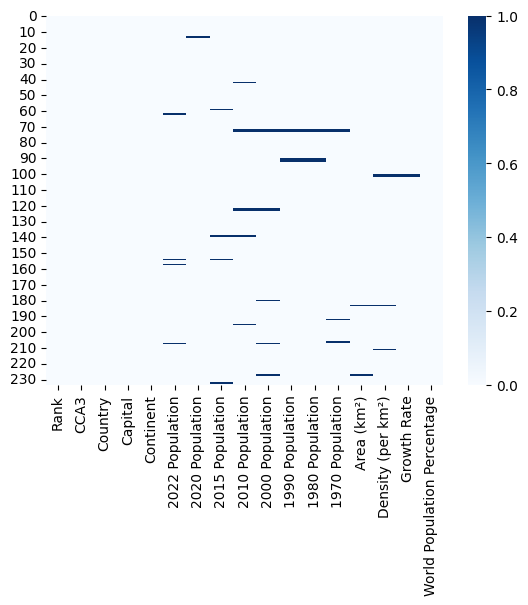

In [114]:
# visualizing the null values
sns.heatmap(df.isnull(), cmap='Blues')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Rank'),
  Text(1, 0, '2022 Population'),
  Text(2, 0, '2020 Population'),
  Text(3, 0, '2015 Population'),
  Text(4, 0, '2010 Population'),
  Text(5, 0, '2000 Population'),
  Text(6, 0, '1990 Population'),
  Text(7, 0, '1980 Population'),
  Text(8, 0, '1970 Population'),
  Text(9, 0, 'Area (km²)'),
  Text(10, 0, 'Density (per km²)'),
  Text(11, 0, 'Growth Rate'),
  Text(12, 0, 'World Population Percentage')])

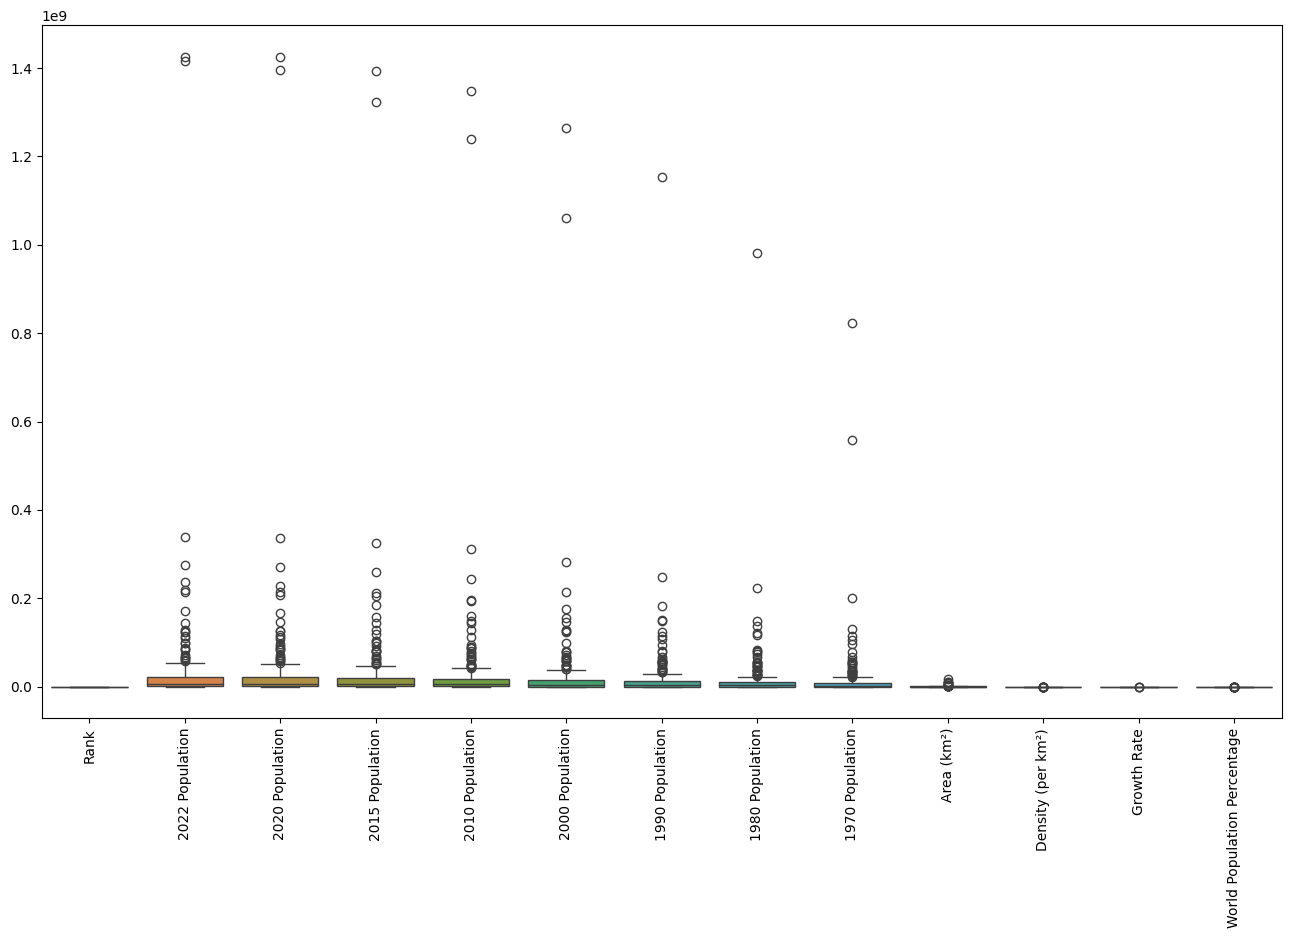

In [115]:
# Check for outliers
# This can be done by using boxplots
plt.figure(figsize=(16,9))
sns.boxplot(df)

plt.xticks(rotation=90)

In [116]:
df.head(5)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00


In [117]:
# Sorting the data by the 2022 population
df.sort_values(by = '2022 Population', ascending = False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,982372466.0,822534450.0,9706961.0,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,NaN,NaN,557501301.0,3287590.0,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,3.382899e+08,3.359420e+08,3.246078e+08,3.111828e+08,2.823986e+08,2.480837e+08,223140018.0,200328340.0,9372610.0,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,2.755013e+08,2.718580e+08,2.590920e+08,2.440162e+08,2.140724e+08,1.821599e+08,148177096.0,115228394.0,1904569.0,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,2.358249e+08,2.271967e+08,2.109693e+08,1.944545e+08,1.543699e+08,1.154141e+08,80624057.0,59290872.0,881912.0,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,2.185412e+08,2.083274e+08,1.839958e+08,1.609529e+08,1.228520e+08,9.521426e+07,72951439.0,55569264.0,923768.0,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,2.153135e+08,2.131963e+08,2.051882e+08,1.963535e+08,1.758737e+08,1.507064e+08,122288383.0,96369875.0,8515767.0,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,1.711864e+08,1.674210e+08,1.578300e+08,1.483911e+08,1.291933e+08,1.071477e+08,83929765.0,67541860.0,147570.0,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,1.447133e+08,1.456173e+08,1.446684e+08,1.432426e+08,1.468448e+08,1.480057e+08,138257420.0,130093010.0,17098242.0,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,1.275041e+08,1.259983e+08,1.201499e+08,1.125324e+08,9.787344e+07,8.172043e+07,67705186.0,50289306.0,1964375.0,64.9082,1.0063,1.60


In [118]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

<Figure size 1600x900 with 0 Axes>

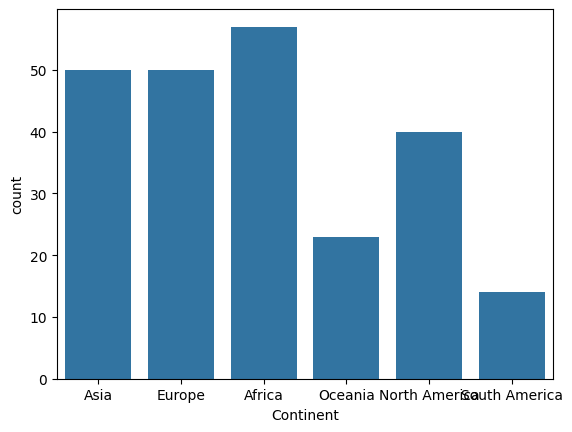

<Figure size 1600x900 with 0 Axes>

In [126]:
sns.countplot(x = 'Continent', data = df)
plt.figure(figsize=(16,9))

In [119]:
# checking the flow of increase accross the year by continent
# Here we will use the groupby aggregation

df.groupby('Continent')[['2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population']].mean().sort_values(by = '2022 Population', ascending=False)

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
Continent,,,,,,,,
Asia,9.632739e+07,9.495513e+07,8.916500e+07,8.908777e+07,8.058084e+07,4.864000e+07,4.027833e+07,4.383988e+07
South America,3.120119e+07,3.082357e+07,2.950960e+07,2.678940e+07,2.501589e+07,2.122474e+07,1.727064e+07,1.378194e+07
Africa,2.545588e+07,2.387144e+07,2.141970e+07,1.889820e+07,1.459837e+07,1.137696e+07,8.586032e+06,6.567175e+06
Europe,1.505537e+07,1.491584e+07,1.502745e+07,1.471228e+07,1.481769e+07,1.478520e+07,1.420000e+07,1.311848e+07
North America,1.500740e+07,1.485591e+07,1.425960e+07,1.356802e+07,1.215174e+07,1.053166e+07,9.207334e+06,7.885865e+06
Oceania,2.046386e+06,1.910149e+06,1.756664e+06,1.613164e+06,1.357512e+06,1.162775e+06,9.965322e+05,8.469683e+05


In [120]:
# Checking Oceanic
df[df['Continent'].str.contains('Oceania')]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
11,55,AUS,Australia,Canberra,Oceania,26177413.0,25670051.0,23820236.0,22019168.0,19017963.0,17048003.0,14706322.0,12595034.0,7692024.0,3.4032,1.0099,0.33
44,223,COK,Cook Islands,Avarua,Oceania,17011.0,17029.0,17695.0,17212.0,15897.0,17123.0,17651.0,20470.0,236.0,72.0805,1.0005,0.00
66,162,FJI,Fiji,Suva,Oceania,929766.0,920422.0,917200.0,905169.0,832509.0,780430.0,644582.0,527634.0,18272.0,50.8847,1.0056,0.01
70,183,PYF,French Polynesia,Papeete,Oceania,306279.0,301920.0,291787.0,283788.0,250927.0,211089.0,163591.0,117891.0,4167.0,73.5011,1.0074,0.00
81,191,GUM,Guam,Hagåtña,Oceania,171774.0,169231.0,167978.0,164905.0,160188.0,138263.0,110286.0,88300.0,549.0,312.8852,1.0073,0.00
107,192,KIR,Kiribati,Tarawa,Oceania,131232.0,126463.0,116707.0,107995.0,88826.0,75124.0,60813.0,57437.0,811.0,161.8150,1.0183,0.00
126,215,MHL,Marshall Islands,Majuro,Oceania,41569.0,43413.0,49410.0,53416.0,54224.0,46047.0,31988.0,23969.0,181.0,229.6630,0.9886,0.00
132,194,FSM,Micronesia,Palikir,Oceania,114164.0,112106.0,109462.0,107588.0,111709.0,98603.0,76299.0,58989.0,702.0,162.6268,1.0091,0.00
142,225,NRU,Nauru,Yaren,Oceania,12668.0,12315.0,11185.0,10241.0,10377.0,9598.0,7635.0,6663.0,21.0,603.2381,1.0125,0.00


In [121]:
df2 = df.groupby('Continent')[['2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population']].mean().sort_values(by = '2022 Population', ascending=False)

df2 = df2.T
df2

Continent,Asia,South America,Africa,Europe,North America,Oceania
2022 Population,9.632739e+07,3.120119e+07,2.545588e+07,1.505537e+07,1.500740e+07,2.046386e+06
2020 Population,9.495513e+07,3.082357e+07,2.387144e+07,1.491584e+07,1.485591e+07,1.910149e+06
2015 Population,8.916500e+07,2.950960e+07,2.141970e+07,1.502745e+07,1.425960e+07,1.756664e+06
2010 Population,8.908777e+07,2.678940e+07,1.889820e+07,1.471228e+07,1.356802e+07,1.613164e+06
2000 Population,8.058084e+07,2.501589e+07,1.459837e+07,1.481769e+07,1.215174e+07,1.357512e+06
1990 Population,4.864000e+07,2.122474e+07,1.137696e+07,1.478520e+07,1.053166e+07,1.162775e+06
1980 Population,4.027833e+07,1.727064e+07,8.586032e+06,1.420000e+07,9.207334e+06,9.965322e+05
1970 Population,4.383988e+07,1.378194e+07,6.567175e+06,1.311848e+07,7.885865e+06,8.469683e+05


### Checking the Correlation

In [122]:
corr_df = df.select_dtypes(exclude = 'object')
corr_df.corr()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.357989,-0.356283,-0.352850,-0.350009,-0.342095,-0.333014,-0.328620,-0.335737,-0.384854,0.128994,-0.220197,-0.358464
2022 Population,-0.357989,1.000000,0.999946,0.999492,0.998633,0.994602,0.991124,0.986675,0.973135,0.452812,-0.028761,-0.022059,0.999999
2020 Population,-0.356283,0.999946,1.000000,0.999764,0.999108,0.995582,0.992557,0.988392,0.975245,0.454902,-0.027802,-0.025976,0.999944
2015 Population,-0.352850,0.999492,0.999764,1.000000,0.999784,0.997343,0.994968,0.991346,0.979413,0.458101,-0.027740,-0.031150,0.999489
2010 Population,-0.350009,0.998633,0.999108,0.999784,1.000000,0.998595,0.996716,0.993628,0.983050,0.461498,-0.026635,-0.038262,0.998630
2000 Population,-0.342095,0.994602,0.995582,0.997343,0.998595,1.000000,0.999192,0.997247,0.990959,0.473137,-0.026341,-0.052041,0.994598
1990 Population,-0.333014,0.991124,0.992557,0.994968,0.996716,0.999192,1.000000,0.999257,0.997158,0.524392,-0.032348,-0.066718,0.991102
1980 Population,-0.328620,0.986675,0.988392,0.991346,0.993628,0.997247,0.999257,1.000000,0.999251,0.530726,-0.032167,-0.077794,0.986652
1970 Population,-0.335737,0.973135,0.975245,0.979413,0.983050,0.990959,0.997158,0.999251,1.000000,0.509942,-0.027523,-0.080020,0.973143
Area (km²),-0.384854,0.452812,0.454902,0.458101,0.461498,0.473137,0.524392,0.530726,0.509942,1.000000,-0.063545,-0.012829,0.453305


<Axes: >

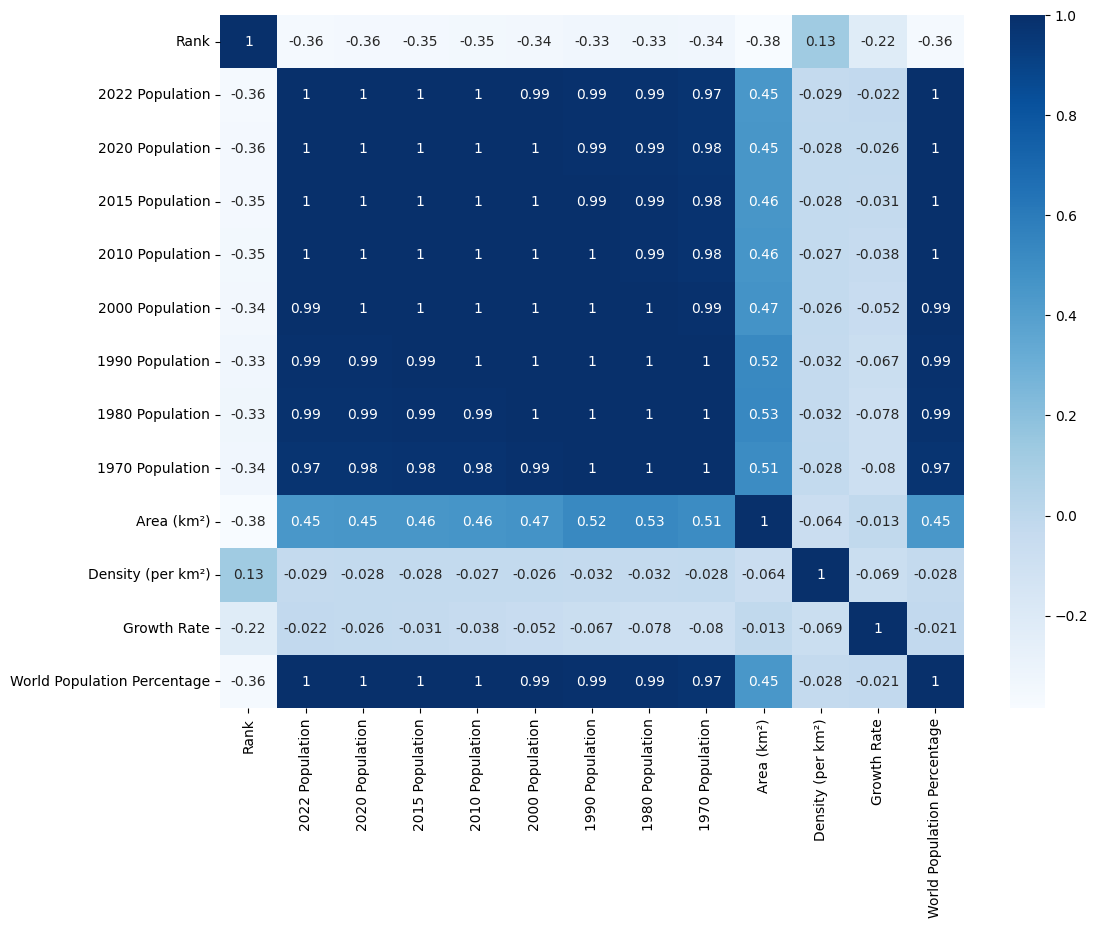

In [123]:
# Visualize the corr_data
plt.figure(figsize = (12,9))
sns.heatmap(corr_df.corr(), cmap = 'Blues', annot = True)

### Trend of Increase in Population Over Year

In [124]:
df3 = df.groupby('Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].mean().sort_values(by = '2022 Population', ascending=False)

df3 = df3.transpose()
df3

Continent,Asia,South America,Africa,Europe,North America,Oceania
1970 Population,4.383988e+07,1.378194e+07,6.567175e+06,1.311848e+07,7.885865e+06,8.469683e+05
1980 Population,4.027833e+07,1.727064e+07,8.586032e+06,1.420000e+07,9.207334e+06,9.965322e+05
1990 Population,4.864000e+07,2.122474e+07,1.137696e+07,1.478520e+07,1.053166e+07,1.162775e+06
2000 Population,8.058084e+07,2.501589e+07,1.459837e+07,1.481769e+07,1.215174e+07,1.357512e+06
2010 Population,8.908777e+07,2.678940e+07,1.889820e+07,1.471228e+07,1.356802e+07,1.613164e+06
2015 Population,8.916500e+07,2.950960e+07,2.141970e+07,1.502745e+07,1.425960e+07,1.756664e+06
2020 Population,9.495513e+07,3.082357e+07,2.387144e+07,1.491584e+07,1.485591e+07,1.910149e+06
2022 Population,9.632739e+07,3.120119e+07,2.545588e+07,1.505537e+07,1.500740e+07,2.046386e+06


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, '2022 Population'),
  Text(0.0, 0, '1970 Population'),
  Text(1.0, 0, '1980 Population'),
  Text(2.0, 0, '1990 Population'),
  Text(3.0, 0, '2000 Population'),
  Text(4.0, 0, '2010 Population'),
  Text(5.0, 0, '2015 Population'),
  Text(6.0, 0, '2020 Population'),
  Text(7.0, 0, '2022 Population'),
  Text(8.0, 0, '')])

<Figure size 1200x600 with 0 Axes>

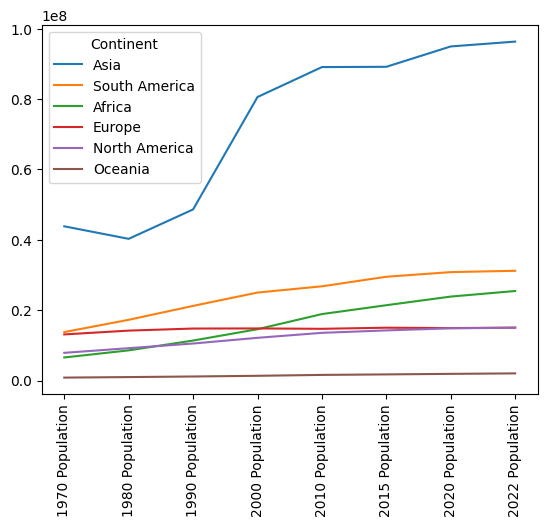

In [125]:
# Visualize
plt.figure(figsize=(12,6))
df3.plot(kind = 'line')
plt.xticks(rotation = 90)